In [126]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [127]:
df = pd.read_csv("../CleanChats/FullChat.csv")

In [128]:
df.head()

,Date,Time,Sender,Message,Section
0,05-09-2023,17:05,+39 338 999 8918,Someone going to the beach this afternoon?,General
1,05-09-2023,17:52,+34 644 34 17 03,We'll be a few minutes late \nSiuuuuuuu,General
2,05-09-2023,17:55,+43 676 3093282,locatie: https://maps.google.com/?q=39.473291...,General
3,05-09-2023,17:56,+48 788 701 788,"Hii, I also will be a few minutes late for th...",General
4,05-09-2023,18:01,+49 1520 2932469,Me too,General


In [129]:
df["Section"].value_counts()

Section
Football      3774
General       2866
Volleyball     381
Party          331
Q&A            135
Music          118
Running         97
Surfing         59
Name: count, dtype: int64

In [130]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7761 entries, 0 to 7760
Data columns (total 5 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   Date     7761 non-null   object
 1   Time     7761 non-null   object
 2   Sender   7761 non-null   object
 3   Message  7761 non-null   object
 4   Section  7761 non-null   object
dtypes: object(5)
memory usage: 303.3+ KB


In [131]:
df["DataTime"] = df["Date"] + "-" + df["Time"]
df["DataTime"]

0       05-09-2023-17:05
1       05-09-2023-17:52
2       05-09-2023-17:55
3       05-09-2023-17:56
4       05-09-2023-18:01
              ...       
7756    23-10-2023-19:14
7757    23-10-2023-19:14
7758    23-10-2023-19:14
7759    23-10-2023-19:14
7760    24-10-2023-22:16
Name: DataTime, Length: 7761, dtype: object

In [132]:
df['Date'] = pd.to_datetime(df['DataTime'], dayfirst=True)
df.drop(["Time", "DataTime"], axis=1, inplace=True)

In [133]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7761 entries, 0 to 7760
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype         
---  ------   --------------  -----         
 0   Date     7761 non-null   datetime64[ns]
 1   Sender   7761 non-null   object        
 2   Message  7761 non-null   object        
 3   Section  7761 non-null   object        
dtypes: datetime64[ns](1), object(3)
memory usage: 242.7+ KB


In [134]:
df.head()

,Date,Sender,Message,Section
0,2023-09-05 17:05:00,+39 338 999 8918,Someone going to the beach this afternoon?,General
1,2023-09-05 17:52:00,+34 644 34 17 03,We'll be a few minutes late \nSiuuuuuuu,General
2,2023-09-05 17:55:00,+43 676 3093282,locatie: https://maps.google.com/?q=39.473291...,General
3,2023-09-05 17:56:00,+48 788 701 788,"Hii, I also will be a few minutes late for th...",General
4,2023-09-05 18:01:00,+49 1520 2932469,Me too,General


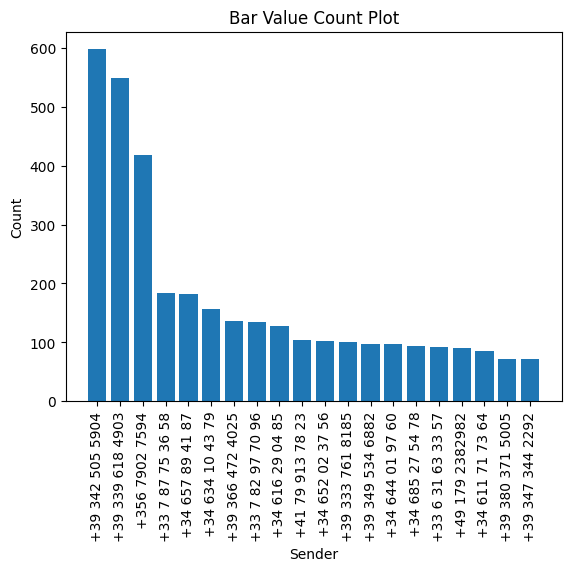

In [194]:
value_counts = df['Sender'].value_counts()[:20]
plt.bar(value_counts.index, value_counts.values, )
plt.xlabel('Sender')
plt.ylabel('Count')
plt.title('Bar Value Count Plot')
plt.xticks(rotation=90)

plt.show()


In [136]:
import phonenumbers
from phonenumbers.phonenumberutil import (
    region_code_for_country_code,
    region_code_for_number,
)

GB


In [137]:
def get_region_code(phone_number):
    try:
        pn = phonenumbers.parse(phone_number)
        return region_code_for_country_code(pn.country_code)
    except :
        print(phone_number) 
        return None
df['Region Code'] = df['Sender'].apply(get_region_code)


Fanni Valencia
Fanni Valencia
Marleen Valencia
Kristof Valencia
Kristof Valencia
Kristof Valencia
David Valencia
David Valencia
Kristof Valencia
David Valencia
David Valencia
David Valencia
David Valencia
Kristof Valencia
Kristof Valencia
Kristof Valencia
Kristof Valencia
Silas Schlenk
David Valencia
Nathalie Valencia
David Valencia
David Valencia
David Valencia
David Valencia
David Valencia
David Valencia
David Valencia
David Valencia
David Valencia
David Valencia
Nathalie Valencia
Lola Valencia
Nathalie Valencia
David Valencia
David Valencia
David Valencia
David Valencia
David Valencia
Nicolò De Luca
Nicolò De Luca
Nicolò De Luca
Nicolò De Luca
David Valencia
David Valencia
Nathalie Valencia
Nicolò De Luca
Nicolò De Luca
David Valencia
David Valencia
Silas Schlenk
Silas Schlenk
Meen Valencia
Meen Valencia
Silas Schlenk
Meen Valencia
Silas Schlenk
Silas Schlenk
Meen Valencia
Silas Schlenk
Meen Valencia
Meen Valencia
Silas Schlenk
Meen Valencia
Meen Valencia
Ludwig Gröber
Meen Valencia

In [142]:
df['Region Code'].value_counts()

Region Code
IT    2445
ES    1917
DE     903
FR     612
MT     421
PL     343
CH     154
AT     128
NL     120
HU     107
CZ      79
IE      53
BE      47
GR      43
NO      32
CO      31
UA      27
LT      26
RO      24
SE      20
PT      20
TR      17
IS      10
PK      10
GB       9
LV       7
BR       6
US       5
DK       5
FI       5
KE       4
UY       4
CL       4
SI       4
PE       4
RS       3
MX       3
EC       3
KR       2
IN       2
TW       2
KH       2
JP       1
PA       1
CY       1
Name: count, dtype: int64

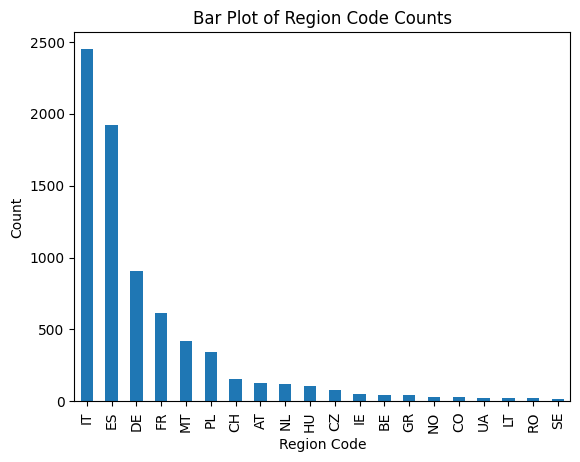

In [144]:
df['Region Code'].value_counts()[:20].plot(kind='bar')

plt.xlabel('Region Code')
plt.ylabel('Count')
plt.title('Bar Plot of Region Code Counts')

plt.show()


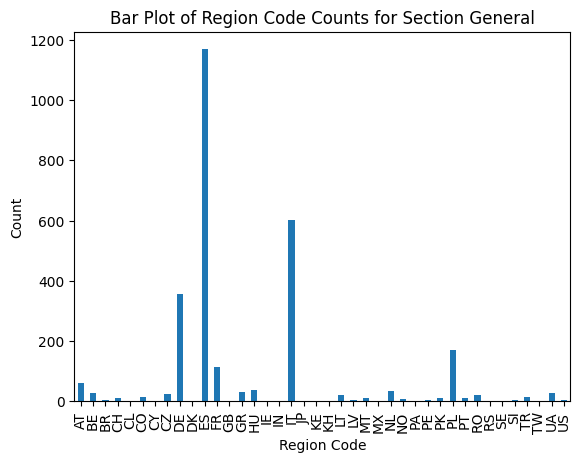

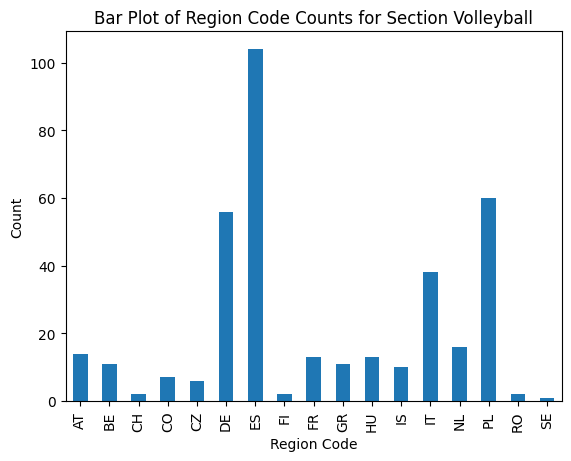

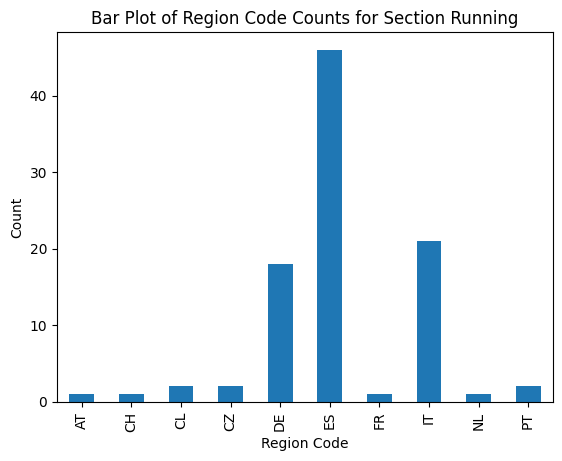

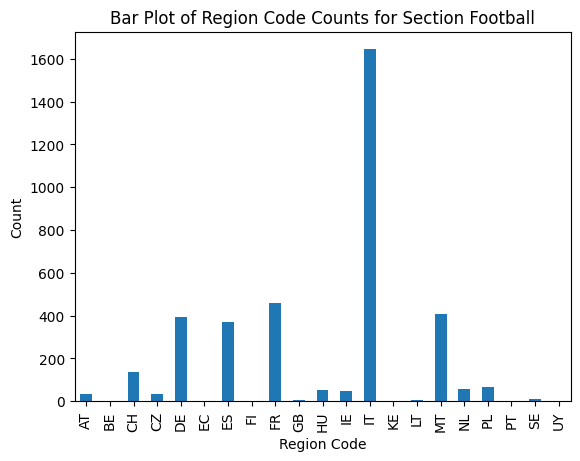

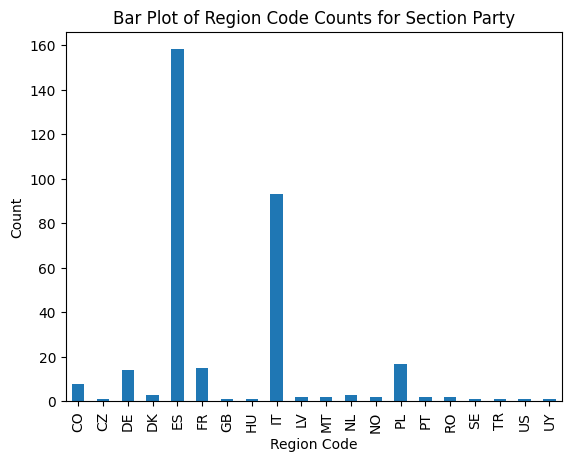

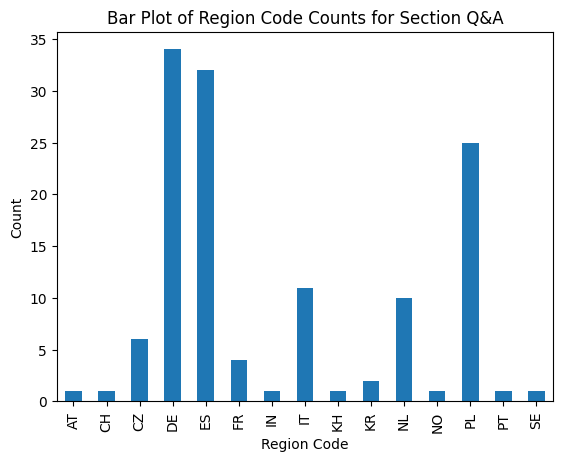

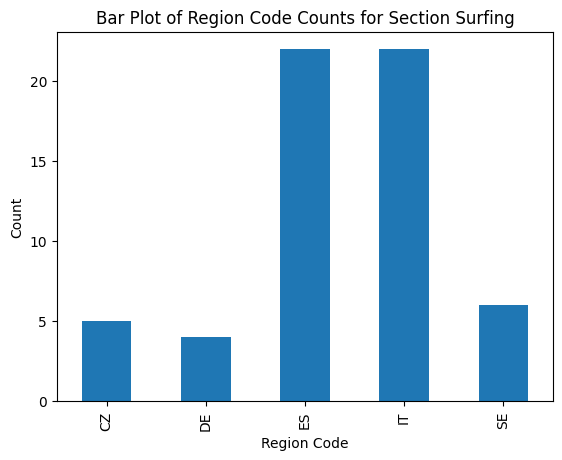

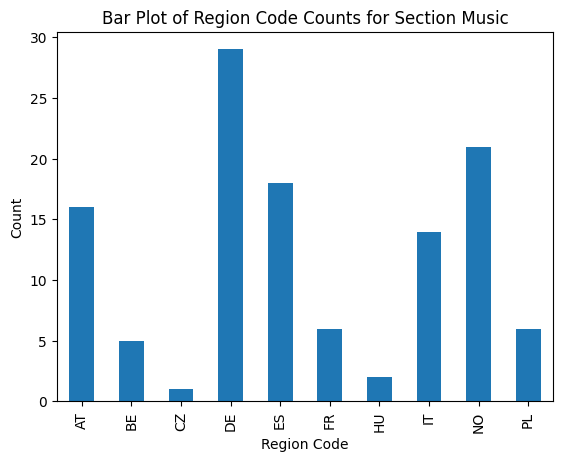

In [158]:
for section in df['Section'].unique():
    section_df = df[df['Section'] == section]
    section_df.groupby('Region Code').size().plot(kind='bar', stacked=True)
    
    # Dodanie etykiet do wykresu
    plt.xlabel('Region Code')
    plt.ylabel('Count')
    plt.title(f'Bar Plot of Region Code Counts for Section {section}')
    
    # Wyświetlenie wykresu
    plt.show()


In [168]:
df["Date"].dt.day_name().value_counts()


Date
Thursday     1493
Wednesday    1411
Friday       1372
Monday        982
Sunday        892
Tuesday       886
Saturday      725
Name: count, dtype: int64

In [171]:
df['DayOfWeek'] = df['Date'].dt.day_name()

day_of_week_counts = df.groupby('Section')['DayOfWeek'].value_counts()


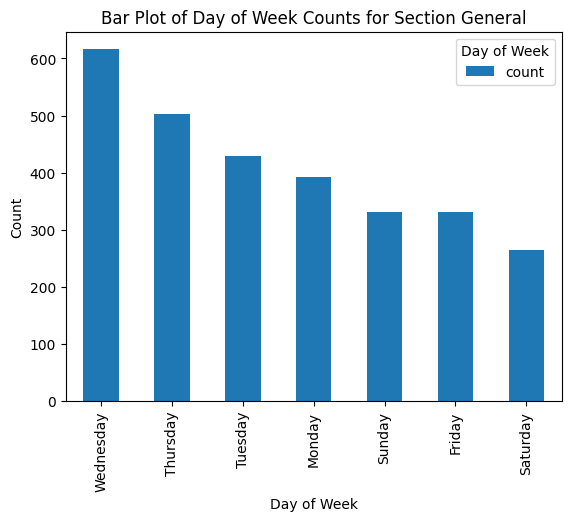

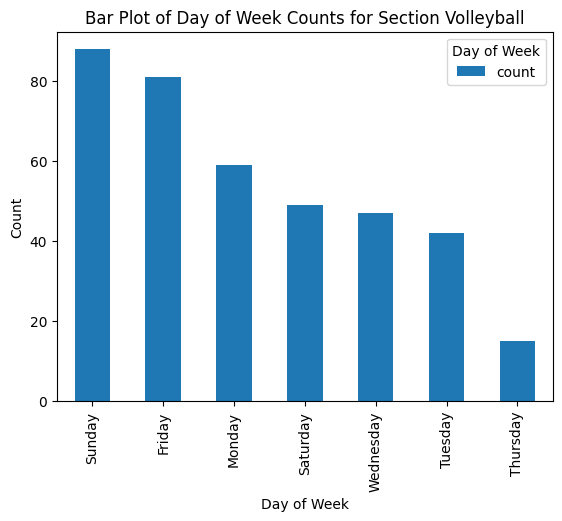

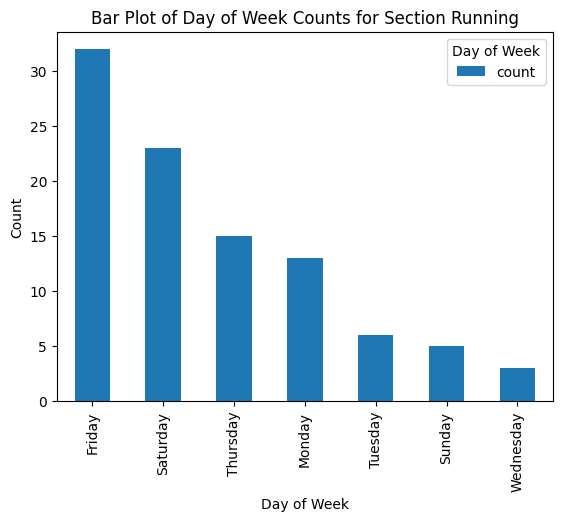

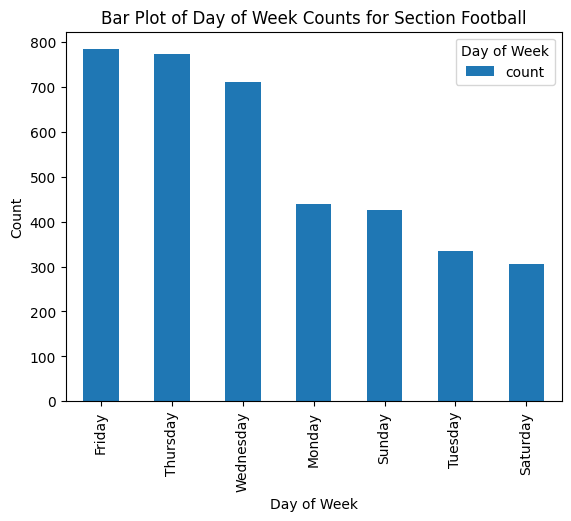

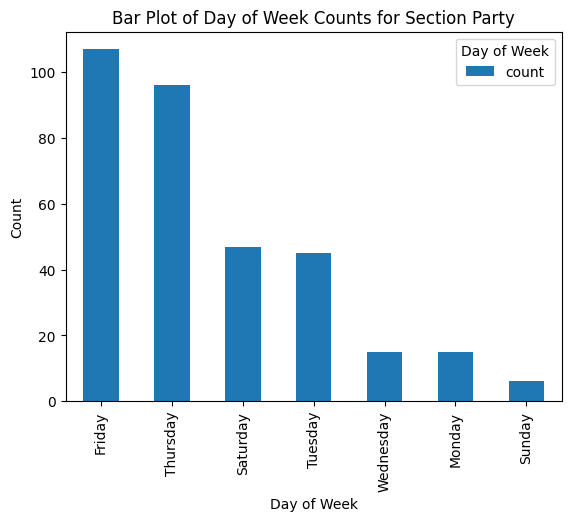

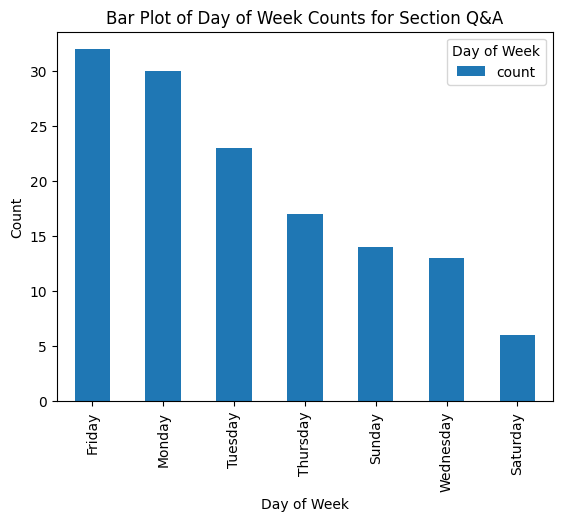

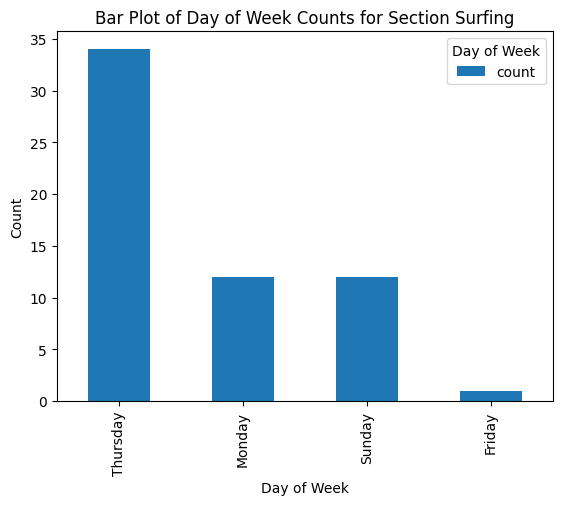

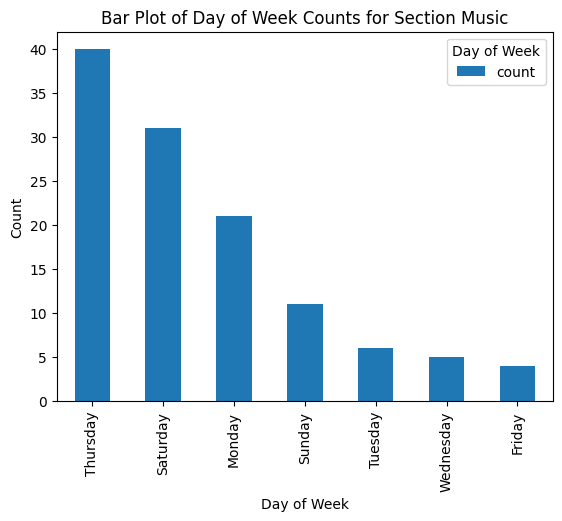

In [174]:
for section in df['Section'].unique():
    section_data = day_of_week_counts.loc[section]
    section_data.plot(kind='bar', stacked=True)

    # Add labels and title
    plt.xlabel('Day of Week')
    plt.ylabel('Count')
    plt.title(f'Bar Plot of Day of Week Counts for Section {section}')

    # Display the legend
    plt.legend(title='Day of Week')

    # Show the plot for the current section
    plt.show()


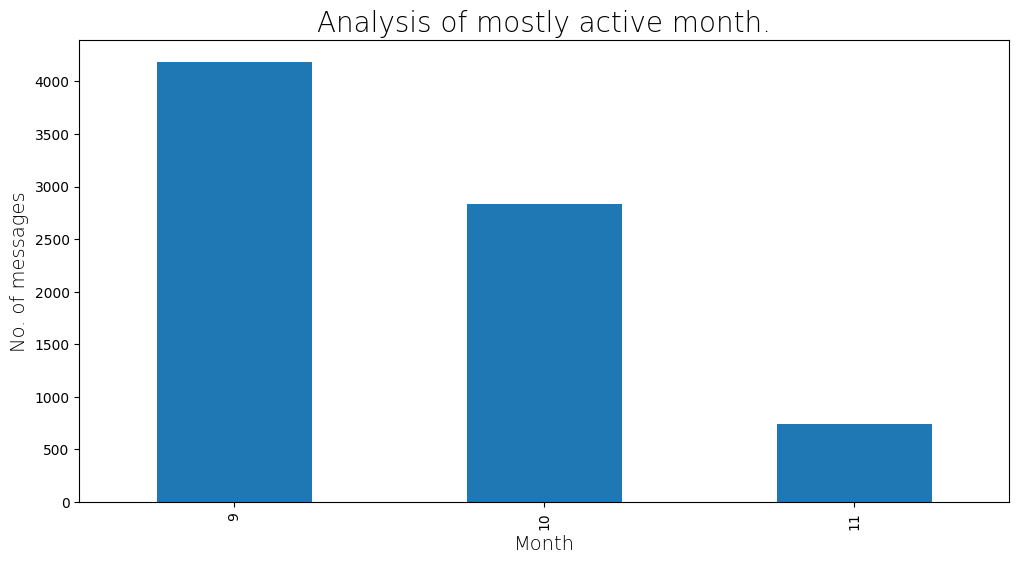

In [179]:
plt.figure(figsize=(12,6))
active_month = df["Date"].dt.month.value_counts()
a_m = active_month
a_m.plot.bar()
plt.xlabel('Month',fontdict={'fontsize': 14,'fontweight': 10})
plt.ylabel('No. of messages',fontdict={'fontsize': 14,'fontweight': 10})
plt.title('Analysis of mostly active month.',fontdict={'fontsize': 20,
        'fontweight': 8})
plt.show()


In [185]:
import emoji
import regex

def split_count(text):
    emoji_list = []
    data = regex.findall(r'\X',text)
    for word in data:
        if any(char in emoji.EMOJI_DATA for char in word):
            emoji_list.append(word)
    return emoji_list
df['emoji'] = df["Message"].apply(split_count)


In [187]:
emojis = sum(df['emoji'].str.len())
print(emojis)


2634


In [193]:
from collections import Counter

total_emojis_list = list(set([a for b in df.emoji for a in b]))
total_emojis = len(total_emojis_list)

total_emojis_list = list([a for b in df.emoji for a in b])
emoji_dict = dict(Counter(total_emojis_list))
emoji_dict = sorted(emoji_dict.items(), key=lambda x: x[1], reverse=True)
for i in emoji_dict:
  print(i)
  
emoji_df = pd.DataFrame(emoji_dict, columns=['emoji', 'count'])[:10]
import plotly.express as px
fig = px.pie(emoji_df, values='count', names='emoji')
fig.update_traces(textposition='inside', textinfo='percent+label')
fig.show()

('✅', 1326)
('😂', 135)
('😅', 55)
('😊', 50)
('🥲', 40)
('☺️', 31)
('😁', 30)
('🤣', 29)
('❤️', 29)
('🔰', 25)
('🔥', 24)
('📍', 21)
('🙏🏻', 20)
('🥰', 20)
('🎟️', 16)
('😄', 15)
('🎉', 15)
('🫶🏻', 14)
('🙏', 14)
('👀', 14)
('👍🏻', 14)
('📝', 13)
('🫶', 12)
('🫶🏼', 11)
('✨', 11)
('😭', 11)
('😇', 10)
('🥳', 10)
('🤪', 9)
('👍🏼', 9)
('🤔', 8)
('😎', 8)
('🥺', 8)
('🤩', 8)
('👌', 8)
('☹️', 8)
('👌🏻', 8)
('🥹', 7)
('😢', 7)
('😉', 7)
('😮', 7)
('😬', 7)
('👍', 7)
('🙌🏼', 7)
('✌️', 7)
('🅰︎', 7)
('⚠️', 6)
('😍', 6)
('🤗', 6)
('🫣', 6)
('🙂', 6)
('😏', 6)
('🤠', 6)
('🪪', 6)
('🤡', 6)
('📅', 6)
('🌚', 5)
('🥴', 5)
('☀️', 5)
('🫶🏽', 5)
('🙈', 5)
('🙏🏼', 5)
('🫢', 5)
('🌊', 5)
('💙', 5)
('👉🏼', 5)
('🫰🏼', 5)
('😮\u200d💨', 5)
('⚽️', 5)
('💪🏼', 5)
('✳️', 5)
('💃', 4)
('🤭', 4)
('🤝', 4)
('😋', 4)
('🫠', 4)
('🎶', 4)
('🤍', 4)
('🤟🏼', 4)
('📆', 4)
('🏳️\u200d🌈', 4)
('✌🏻', 4)
('🙌', 4)
('🤟', 4)
('😔', 4)
('😌', 3)
('🆓', 3)
('😕', 3)
('🌞', 3)
('🧐', 3)
('✌🏼', 3)
('🎊', 3)
('🤑', 3)
('💀', 3)
('💜', 3)
('🥶', 3)
('🌍', 3)
('🤙🏻', 3)
('🤌', 3)
('🤝🏼', 3)
('🎓', 3)
('😫', 3)
('🗣️', 3)

In [202]:
from langdetect import detect, detect_langs
from translate import Translator

def translate_text(text, target_language='en'):
    try:
        source_language = detect(text)
        if source_language == target_language:
            return text
        elif source_language != "es":
            print(f"[WARNING] NOT SPANISH ({source_language}): {text}")

        translator= Translator(to_lang=target_language, from_lang=source_language)
        translation = translator.translate(text)
        return translation
    except:
        return text

In [203]:
df['translate message'] = df["Message"].apply(translate_text)


[WARNING] NOT SPANISH (et):  We'll be a few minutes late 
Siuuuuuuu
[WARNING] NOT SPANISH (ro):  locatie: https://maps.google.com/?q=39.4732915,-0.33565
[WARNING] NOT SPANISH (id):  Same
[WARNING] NOT SPANISH (it):  Siete ancora la?
[WARNING] NOT SPANISH (tr):  Yes
[WARNING] NOT SPANISH (vi):  Tu?
[WARNING] NOT SPANISH (ro):  locatie: https://maps.google.com/?q=39.4764253,-0.3769933
[WARNING] NOT SPANISH (pt):  Siamo qua
[WARNING] NOT SPANISH (it):  Ok, arriviamo
[WARNING] NOT SPANISH (it):  Dove siete di preciso?
[WARNING] NOT SPANISH (pt):  Ok, siamo qui
[WARNING] NOT SPANISH (so):  In case you wanna join
[WARNING] NOT SPANISH (fi):  No me jodas illo
[WARNING] NOT SPANISH (ca):  Natura Dub
Carrer de l'Explorador Andrés, 19
locatie: https://maps.google.com/?q=39.47224044799805,-0.34660330414772034
[WARNING] NOT SPANISH (it):  Necesito reservar?
[WARNING] NOT SPANISH (af):  Noo
[WARNING] NOT SPANISH (tl):  Anybody at natura already?
[WARNING] NOT SPANISH (fi):  Yesss
[WARNING] NOT SPAN

In [204]:
df.head()

,Date,Sender,Message,Section,Region Code,DayOfWeek,emoji,translate message
0,2023-09-05 17:05:00,+39 338 999 8918,Someone going to the beach this afternoon?,General,IT,Tuesday,[],Someone going to the beach this afternoon?
1,2023-09-05 17:52:00,+34 644 34 17 03,We'll be a few minutes late \nSiuuuuuuu,General,ES,Tuesday,[],We'll be a few minutes late \nSiuuuuuu
2,2023-09-05 17:55:00,+43 676 3093282,locatie: https://maps.google.com/?q=39.473291...,General,AT,Tuesday,[],location: https://maps.google.com/?q=39.473291...
3,2023-09-05 17:56:00,+48 788 701 788,"Hii, I also will be a few minutes late for th...",General,PL,Tuesday,[],"Hii, I also will be a few minutes late for th..."
4,2023-09-05 18:01:00,+49 1520 2932469,Me too,General,DE,Tuesday,[],Me too


In [205]:
df.to_csv("FullChatTranslated.csv", index=False)

In [2]:
import pandas as pd
df = pd.read_csv("FullChatTranslated.csv")
df.head()

,Date,Sender,Message,Section,Region Code,DayOfWeek,emoji,translate message
0,2023-09-05 17:05:00,+39 338 999 8918,Someone going to the beach this afternoon?,General,IT,Tuesday,[],Someone going to the beach this afternoon?
1,2023-09-05 17:52:00,+34 644 34 17 03,We'll be a few minutes late \nSiuuuuuuu,General,ES,Tuesday,[],We'll be a few minutes late \nSiuuuuuu
2,2023-09-05 17:55:00,+43 676 3093282,locatie: https://maps.google.com/?q=39.473291...,General,AT,Tuesday,[],location: https://maps.google.com/?q=39.473291...
3,2023-09-05 17:56:00,+48 788 701 788,"Hii, I also will be a few minutes late for th...",General,PL,Tuesday,[],"Hii, I also will be a few minutes late for th..."
4,2023-09-05 18:01:00,+49 1520 2932469,Me too,General,DE,Tuesday,[],Me too


In [4]:
for section_value in df['Section'].unique():
    section_df = df[df['Section'] == section_value]
    section_df["Message"].to_csv(f'data_{section_value}.csv', index=False)
